# Mercedes-Benz's Initiative for More Environmentally Sustainable Manufacturing

## Motivation & Aim: 
Minimize the duration of Mercedes-Benz vehicles undergoing testing on the bench.

## Problem Statement Scenario:

Mercedes-Benz has been at the forefront of automotive advancements, introducing crucial innovations such as the passenger safety cell incorporating a crumple zone, the airbag, and intelligent assistance systems. With nearly 2000 patent applications per year, Mercedes-Benz holds the top position among premium car manufacturers in Europe. Renowned as a leader in the premium automotive sector, Mercedes-Benz offers an extensive array of features and options, enabling customers to craft their ideal personalized Mercedes-Benz.

Ensuring the safety and dependability of each distinct car configuration before it hits the road is a priority, prompting the company's engineers to devise a robust testing framework. As one of the largest producers of premium vehicles worldwide, Mercedes-Benz places utmost importance on safety and efficiency along its production lines. Nevertheless, streamlining the testing process to accommodate numerous potential feature combinations presents a complex and time-consuming challenge without the aid of sophisticated algorithmic solutions.

## Tasks to be performed:
1. Eliminate any column(s) where the variance equals zero.
2. Verify null and unique values in both the test and train datasets.
3. Implement label encoding.
4. Conduct dimensionality reduction.
5. Utilize XGBoost to make predictions for the test_df values.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
 #To display full output in Jupyter, not just last result of a particular cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# To display upto 4000 rows while showing output
pd.options.display.max_rows = 4000

In [4]:
 #uploading training & Test dataset:
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

# Exploratory Data Analysis (EDA)

In [5]:
train_data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,...,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,...,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,...,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#calculating dimensions
rows, columns = train_data.shape
print('Rows = ' , rows, 'Columns =' , columns )

Rows =  4209 Columns = 378


In [8]:
#checking info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [9]:
#checking description
train_data.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#checking description for better understanding
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,4209.0,4205.960798,2437.608688,0.00,2095.00,4220.00,6314.00,8417.00
y,4209.0,100.669318,12.679381,72.11,90.82,99.15,109.01,265.32
X10,4209.0,0.013305,0.114590,0.00,0.00,0.00,0.00,1.00
X11,4209.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
X12,4209.0,0.075077,0.263547,0.00,0.00,0.00,0.00,1.00
X13,4209.0,0.057971,0.233716,0.00,0.00,0.00,0.00,1.00
X14,4209.0,0.428130,0.494867,0.00,0.00,0.00,1.00,1.00
X15,4209.0,0.000475,0.021796,0.00,0.00,0.00,0.00,1.00
X16,4209.0,0.002613,0.051061,0.00,0.00,0.00,0.00,1.00
X17,4209.0,0.007603,0.086872,0.00,0.00,0.00,0.00,1.00


In [11]:
#checking duplicated values based on all columns
duplicate = train_data[train_data.duplicated(keep = 'last')]
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [ID, y, X0, X1, X2, X3, X4, X5, X6, X8, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X26, X27, X28, X29, X30, X31, X32, X33, X34, X35, X36, X37, X38, X39, X40, X41, X42, X43, X44, X45, X46, X47, X48, X49, X50, X51, X52, X53, X54, X55, X56, X57, X58, X59, X60, X61, X62, X63, X64, X65, X66, X67, X68, X69, X70, X71, X73, X74, X75, X76, X77, X78, X79, X80, X81, X82, X83, X84, X85, X86, X87, X88, X89, X90, X91, X92, X93, X94, X95, X96, X97, X98, X99, X100, X101, ...]
Index: []

[0 rows x 378 columns]


##### No duplicate cells

# 1. Checking if any columns has the variance equal to zero & then removing those variables.

##### Checking for columns with zero variance is a crucial step in data preprocessing, especially for machine learning tasks. When a column has zero variance, it means that all values are identical. Removing such columns is essential because they lack discriminatory power, provide no useful information for analysis or prediction, and may indicate errors in data handling. Additionally, keeping zero variance columns can increase computational complexity without improving model quality. Some algorithms may also behave unexpectedly when fed with such features. By removing these columns, you streamline the dataset, potentially improving model performance and reducing the risk of errors.

### Train Data

In [12]:
#Checking which columns has variance 0
##a= train_data.var() == 0
##a

train_data = train_data.apply(pd.to_numeric, errors='coerce')

# Calculate variance
variance = train_data.var()

# Identify columns with zero variance
a = variance[variance == 0].index
a

Index(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293',
       'X297', 'X330', 'X347'],
      dtype='object')

In [13]:
#Creating a list of columns whose variance is zero
##b = a[a].index.to_list()
##b
# Calculate the variance of each column
##column_variances = a.var()

# Select columns with zero variance
##b = column_variances[column_variances == 0].index.tolist()
##b


# Select columns with zero variance
b = a.tolist()
b

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [14]:
# dropping columns whose variance is zero
train_data.drop(b, axis = 1,inplace=True)

In [15]:
train_data.dtypes.value_counts()

int64      357
float64      9
Name: count, dtype: int64

##### 8 categorical features and 358 numerical features

### Test data

In [16]:
#Dropping test columns whose train column variance is zero 
#(Removing these columns from test data so that both train test have same columns and 
# it is necessary to have same coliumns in train and test data)

test_data.drop(b, axis = 1,inplace=True)
test_data.dtypes.value_counts()

int64     357
object      8
Name: count, dtype: int64

# 2. Check for null and unique values for test and train sets

In [17]:
train_data.isnull().any().any()

True

In [18]:
test_data.isnull().any().any()

False

### No missing values found in both train and test data

## Checking unique values in each column to understand cardinality

In [19]:
train_data.nunique().sort_values(ascending=False)

ID      4209
y       2545
X194       2
X263       2
X261       2
X260       2
X259       2
X258       2
X257       2
X256       2
X255       2
X254       2
X253       2
X252       2
X251       2
X250       2
X249       2
X248       2
X247       2
X246       2
X245       2
X244       2
X243       2
X262       2
X264       2
X195       2
X265       2
X285       2
X284       2
X283       2
X282       2
X281       2
X280       2
X279       2
X278       2
X277       2
X276       2
X275       2
X274       2
X273       2
X272       2
X271       2
X270       2
X269       2
X267       2
X266       2
X242       2
X241       2
X286       2
X239       2
X214       2
X213       2
X212       2
X211       2
X210       2
X209       2
X208       2
X207       2
X206       2
X205       2
X204       2
X203       2
X202       2
X201       2
X200       2
X199       2
X198       2
X197       2
X196       2
X215       2
X216       2
X217       2
X228       2
X238       2
X237       2
X236       2
X234       2

In [20]:
test_data.nunique().sort_values(ascending=False)

ID      4209
X0        49
X2        45
X5        32
X1        27
X8        25
X6        12
X3         7
X4         4
X251       2
X261       2
X260       2
X259       2
X256       2
X255       2
X254       2
X253       2
X252       2
X246       2
X250       2
X249       2
X248       2
X247       2
X263       2
X245       2
X244       2
X243       2
X242       2
X262       2
X269       2
X264       2
X276       2
X284       2
X283       2
X282       2
X281       2
X280       2
X279       2
X278       2
X277       2
X275       2
X265       2
X274       2
X273       2
X272       2
X271       2
X270       2
X240       2
X267       2
X266       2
X241       2
X234       2
X239       2
X205       2
X213       2
X212       2
X211       2
X210       2
X209       2
X208       2
X207       2
X206       2
X204       2
X215       2
X203       2
X202       2
X201       2
X200       2
X199       2
X198       2
X197       2
X196       2
X214       2
X216       2
X238       2
X227       2
X237       2

# 3. Applying label encoder for categorical features:

In [21]:
#Extracting numeric columns and removing them from all columns and storing it as cat_cols
cols = train_data.columns
num_cols = train_data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

[]

1. `cols = train_data.columns`: This line gets all the column names from a dataset called `train_data` and stores them in a variable named `cols`. Think of `cols` as a list containing the names of all the columns in the dataset.

2. `num_cols = train_data._get_numeric_data().columns`: This line extracts only the columns that contain numeric data from the `train_data` dataset and stores their names in a variable named `num_cols`. So, `num_cols` holds the names of columns that contain numbers, like integers or floating-point numbers.

3. `cat_cols = list(set(cols) - set(num_cols))`: This line finds the names of columns that are not numeric (i.e., categorical columns) in the `train_data` dataset. It does this by taking the set of all column names (`set(cols)`) and subtracting the set of numeric column names (`set(num_cols)`). The result is a set of names of columns that are not numeric. Then, it converts this set into a list and assigns it to the variable `cat_cols`. So, `cat_cols` contains the names of columns that contain categorical data, like strings or categories.

##### In simpler terms, the code identifies which columns in a dataset contain numbers and which ones contain categories (things like labels or names).

#### Unique values of 'X0','X2','X5' in test data are high indicating presence of new labels. 
#### Created a class 'LabelEncoderExt' which supports these kind of scenerios by assigning a number for unknown labels. 

In [22]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [23]:
# Applying label encoder to columns of train & test data:
for c in cat_cols:
    label_encoder = LabelEncoderExt()
    label_encoder.fit(train_data[c])
    train_data[c] =label_encoder.transform(train_data[c])
    test_data[c]=label_encoder.transform(test_data[c])

# 4. Performing Dimensionality Reduction using Principal Component Analysis (PCA)

In [24]:
#Storing target variable and dropping it from train data. 
y_train = train_data['y']
del train_data['y']

#Also dropping ID column from train data as it is not important factor to consider
del train_data['ID']

In [25]:
#Also dropping ID column in test data as it is not important factor to consider
test_data_ID=test_data['ID']
del test_data['ID']

In [26]:
# Transforming scaled data to its first 8 principal components.
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Assuming train_data is your input data with NaN values
# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose different strategies based on your data
train_data_imputed = imputer.fit_transform(train_data)

# Step 2: Apply PCA
pca = PCA(n_components=8)
pca.fit(train_data_imputed)
x_pca = pca.transform(train_data_imputed)
print(x_pca.shape)

PCA(n_components=8)

(4209, 8)


In [27]:
#Printing the explained variance.
pca.explained_variance_ratio_

array([0.13075463, 0.08895904, 0.08608808, 0.06848157, 0.05775222,
       0.04803243, 0.03839034, 0.03295792])

<BarContainer object of 8 artists>

Text(0.5, 1.0, 'Scree Plot')

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Variance Explained')

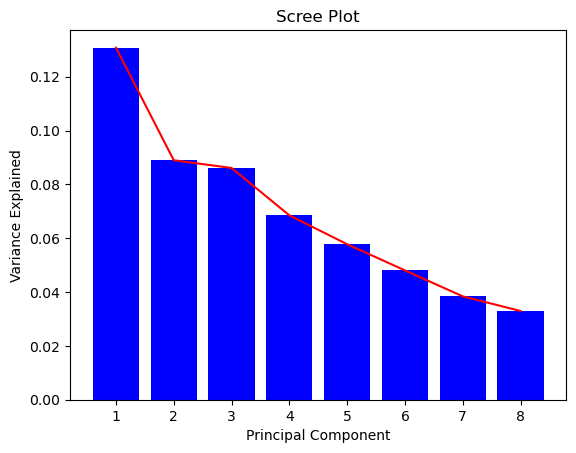

In [28]:
#Scree plot
import matplotlib.pyplot as plt
%matplotlib inline
PC_values = np.arange(pca.n_components_) + 1
plt.bar(PC_values, pca.explained_variance_ratio_, color='blue')
plt.plot(PC_values, pca.explained_variance_ratio_, color='red')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.savefig('./assets/Principal_Component Vs Variance_Explained.png')

### 94% of the data is captured by first 5 components. So, will be considering 5 components 

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Assuming train_data is your input data with NaN values
# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose different strategies based on your data
train_data_imputed = imputer.fit_transform(train_data)

# Step 2: Apply PCA
pca = PCA(n_components=5)
pca.fit(train_data_imputed)
x_train_pca = pca.transform(train_data_imputed)
print(x_train_pca.shape)

PCA(n_components=5)

(4209, 5)


In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Assuming 'test_data' is your dataset with mixed data types including strings

# Separate numeric and non-numeric columns
numeric_columns = test_data.select_dtypes(include=['number']).columns
non_numeric_columns = test_data.select_dtypes(exclude=['number']).columns

# Define pipelines for numeric and non-numeric data
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

non_numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # You can use LabelEncoder for ordinal categorical variables
])

# Combine numeric and non-numeric pipelines using ColumnTransformer
preprocessor = ColumnTransformer([
    ('numeric', numeric_pipeline, numeric_columns),
    ('non_numeric', non_numeric_pipeline, non_numeric_columns)
])

# Apply preprocessing
processed_data = preprocessor.fit_transform(test_data)

# Now, you can apply PCA
pca = PCA(n_components=5)
x_test_pca = pca.fit_transform(processed_data)

print(x_test_pca.shape)


(4209, 5)


#### Performing data preprocessing and dimensionality reduction using Principal Component Analysis (PCA) in a machine learning pipeline using Scikit-learn in Python. Let's break down what each part does:

1. **Imports**: 
   - `PCA`: This is the class for Principal Component Analysis from Scikit-learn's decomposition module.
   - `StandardScaler`, `OneHotEncoder`, `SimpleImputer`, `ColumnTransformer`, and `Pipeline`: These are various tools and transformers provided by Scikit-learn for data preprocessing and pipeline construction.
   - `pandas`: This is imported as `pd` and is used for data manipulation.

2. **Separating Numeric and Non-numeric Columns**:
   - The code first separates the numeric columns and non-numeric columns from the dataset `test_data`.

3. **Defining Pipelines**:
   - Two pipelines are defined:
     - `numeric_pipeline`: This pipeline includes imputation of missing values with the mean and scaling of numeric features using `SimpleImputer` and `StandardScaler`.
     - `non_numeric_pipeline`: This pipeline imputes missing values with the most frequent value and encodes categorical variables using one-hot encoding.

4. **Combining Pipelines with ColumnTransformer**:
   - The `ColumnTransformer` combines the two pipelines, specifying which pipeline to apply to which columns based on their data types.

5. **Preprocessing Data**:
   - The `preprocessor` is applied to the `test_data` using the `fit_transform` method, which applies the appropriate transformations to each column based on its data type.

6. **Applying PCA**:
   - After preprocessing, PCA is applied to the processed data to reduce its dimensionality to 5 principal components.

7. **Printing the Shape**:
   - Finally, the shape of the transformed data (`x_test_pca`) is printed.

##### This pipeline is useful for preprocessing mixed data types (numeric and categorical) and then reducing dimensionality using PCA, which is a common preprocessing step in machine learning workflows. The final transformed data `x_test_pca` will have reduced dimensions suitable for further analysis or modeling.

# 5. Predicting test_dataframe values using XGBoost.

### Creating valid set, trainset

In [31]:
import xgboost as xg
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

x_train_f, x_valid_f, y_train_f, y_valid_f = train_test_split(x_train_pca, y_train, test_size=0.3,random_state=123)

In [32]:
#Creating train, validation and test feature set:
d_train = xg.DMatrix(x_train_f, label=y_train_f)
d_valid = xg.DMatrix(x_valid_f, label=y_valid_f)
d_test = xg.DMatrix(x_test_pca)

1. **Feature Sets Creation**: 
   - Sets of features are created for training, validation, and testing. These features represent the characteristics or attributes of the dataset that the model learns from.

2. **Feature Set Names**:
   - Specific sets such as `x_train_f`, `x_valid_f`, and `x_test_pca` are mentioned, likely representing the feature sets for training, validation, and testing respectively.

3. **Labels for Training and Validation**:
   - `y_train_f` and `y_valid_f` are used for training and validation respectively, indicating the expected outputs or labels for the corresponding feature sets. This is crucial in supervised learning.

4. **Using `xg.DMatrix()` Function**:
   - The `xg.DMatrix()` function from the XGBoost library is utilized to create a specialized data structure called DMatrix. This structure optimizes memory usage and training speed.

5. **DMatrix Creation**:
   - `d_train`, `d_valid`, and `d_test` are created as DMatrix objects for the training, validation, and test sets respectively. These objects efficiently organize the input features and labels for XGBoost.

6. **Label Assignment**:
   - While the training and validation sets have labels (`label=y_train_f` and `label=y_valid_f`), the test set (`x_test_pca`) does not include labels. This is standard practice for predicting outcomes on new, unseen data.

##### In essence, the workflow involves preparing separate datasets with features and labels for training, validation, and testing. The use of specialized data structures and the absence of labels in the test set for prediction on new data are highlighted.

In [33]:
# Setting the parameters for XGB
param = {'objective': 'reg:linear', 'eta': 0.03, 'max_depth': 4}
xgb_r = xg.train(params=param,dtrain = d_train, num_boost_round = 10)
y_train_pred = xgb_r.predict(d_train)
y_valid_pred = xgb_r.predict(d_valid)
y_test_pred = xgb_r.predict(d_test)

## Evaluating model performance Metrics:

In [34]:
from sklearn.metrics import r2_score 

# Calculating R^2 score for train and test
R_square_train = r2_score(y_train_pred, y_train_f) 
R_square_valid = r2_score(y_valid_pred, y_valid_f) 
print('R^2 train:', R_square_train) 
print('R^2 valid set:', R_square_valid) 

R^2 train: -38.372561883522685
R^2 valid set: -37.07352695522978


In [35]:
### ----- RMSE Computation for train and valid sets------###
# Train set
rmse_train = np.sqrt(MSE(y_train_f, y_train_pred))
print("RMSE of train data: % f" %(rmse_train))

#Valid set
rmse_valid = np.sqrt(MSE(y_valid_f, y_valid_pred))
print("RMSE of valid set data : % f" %(rmse_valid))

RMSE of train data:  11.676117
RMSE of valid set data :  11.536331


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted values - Train data')

Text(0.5, 0, 'Actual values')

Text(0, 0.5, 'Predicted values')

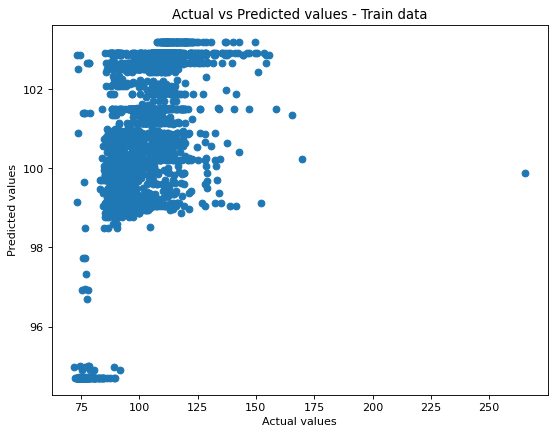

In [36]:
from matplotlib.pyplot import figure
# Actual vs Predicted on Train data
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_train_f,y_train_pred)
plt.title("Actual vs Predicted values - Train data")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.savefig('./assets/Actual_values vs Predicted_values - Train data.png')
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted values - Validation data')

Text(0.5, 0, 'Actual values')

Text(0, 0.5, 'Predicted values')

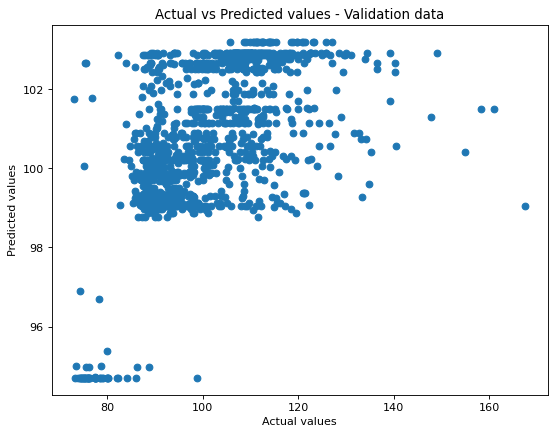

In [37]:
# Actual vs Predicted on Validation data
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_valid_f,y_valid_pred)
plt.title("Actual vs Predicted values - Validation data")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.savefig('./assets/Actual_values vs Predicted_values - Validation data.png')
plt.show()

## Inferences: 
1. From the plots it is clear that the param values given are doing extreme pruning leading to a constant value.
   Detailed -  Looking at the graphs, it's obvious that the parameter values provided are causing significant   pruning, resulting in a consistent value.
2. R^2 value tend to be negative indicating model built is a worst fit and predicted values are worse than considering mean for all observations
   Detailed -  When the R-squared values are negative, it means that the model created is a poor fit, and the predicted values are even worse than simply using the average for all the data points.

### So, there is a need for  Hyper parameter Tuning! 

# XG Boost +  Hyper parameter Tuning (Bayesian Optimisation Technique)

##### XGBoost is a powerful machine learning algorithm known for its efficiency and effectiveness in predictive modeling tasks, particularly in structured data. It's an implementation of gradient boosted decision trees designed for speed and performance.
##### Hyperparameter tuning is the process of finding the best combination of parameters for a given machine learning model to optimize its performance. This is crucial for achieving the best possible accuracy and generalization on unseen data.
##### Bayesian optimization is a technique used for hyperparameter tuning that aims to find the optimal set of hyperparameters by building a probabilistic model of the objective function (in this case, the model's performance metric) and then selecting the next set of hyperparameters to evaluate based on the model's predictions.
##### By combining XGBoost with Bayesian optimization for hyperparameter tuning, we can efficiently search through the hyperparameter space to find the combination that maximizes the model's performance, leading to better predictive accuracy and generalization.

Grid Search, Randomised Search are quite time-consuming and computationally Expensive if we have many Hyper parameters. So, Bayesian Optimisation Technique is used


In [38]:
# Trying Bayesian HPT Technique
# import machine learning libraries
import xgboost as xg

# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

`Hyperopt` is a Python library for optimizing machine learning models by tuning their hyperparameters. It provides a flexible and efficient framework for performing hyperparameter optimization using various optimization algorithms.

1. **Trials**: `Trials` is a data structure used to store the results of each evaluation of the objective function during the hyperparameter search. It keeps track of the hyperparameters and their corresponding evaluation metrics.

2. **fmin**: `fmin` is the main function in `Hyperopt` used for minimizing an objective function over a hyperparameter space. It takes as arguments the objective function to minimize, the search space (defined using `hp`), the optimization algorithm (such as TPE), and optionally a `Trials` object to store the evaluation results.

3. **hp**: `hp` is a module in `Hyperopt` used to define the search space for hyperparameters. It provides functions for defining different types of hyperparameters, such as continuous variables (`hp.uniform`), discrete variables (`hp.choice`), and conditional hyperparameters.

4. **tpe**: TPE stands for Tree-structured Parzen Estimator, which is one of the optimization algorithms available in `Hyperopt`. TPE is a sequential model-based optimization (SMBO) algorithm that uses a probabilistic model to guide the search for the optimal hyperparameters. It maintains a probability distribution over the hyperparameter space and updates it based on the results of previous evaluations to focus the search on promising regions.

5. **STATUS_OK**: `STATUS_OK` is a constant defined in `Hyperopt` that indicates the successful evaluation of the objective function. It is typically used as the return value from the objective function to signal that the evaluation was completed without errors.

`Hyperopt` provides a powerful and easy-to-use framework for hyperparameter optimization, allowing users to efficiently search for the optimal hyperparameters of their machine learning models.

In [39]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 123,
       'subsample': [0.5, 0.7],
       
    }

#### This is a Python dictionary representing the search space for hyperparameters using the `Hyperopt` library. 

1. `'max_depth'`: This hyperparameter controls the maximum depth of the decision tree in XGBoost. It is defined as a discrete uniform distribution (`hp.quniform`) ranging from 3 to 18 with steps of 1.

2. `'gamma'`: Gamma is a regularization parameter for controlling the complexity of the decision trees in XGBoost. It is defined as a continuous uniform distribution (`hp.uniform`) ranging from 1 to 9.

3. `'reg_alpha'`: This hyperparameter is the L1 regularization term on weights in XGBoost. It is defined as a discrete uniform distribution (`hp.quniform`) ranging from 40 to 180 with steps of 1.

4. `'reg_lambda'`: This hyperparameter is the L2 regularization term on weights in XGBoost. It is defined as a continuous uniform distribution (`hp.uniform`) ranging from 0 to 1.

5. `'colsample_bytree'`: This hyperparameter specifies the fraction of features to be randomly sampled for each tree. It is defined as a continuous uniform distribution (`hp.uniform`) ranging from 0.5 to 1.

6. `'min_child_weight'`: This hyperparameter specifies the minimum sum of instance weight needed in a child. It is defined as a discrete uniform distribution (`hp.quniform`) ranging from 0 to 10 with steps of 1.

7. `'n_estimators'`: This hyperparameter specifies the number of trees to be used in the XGBoost model. It is set to a constant value of 180.

8. `'seed'`: This hyperparameter sets the random seed for reproducibility of results. It is set to a constant value of 123.

9. `'subsample'`: This hyperparameter specifies the fraction of samples to be used for training each tree. It is defined as a list with two values `[0.5, 0.7]`, indicating two options for subsampling.

##### This search space defines a range of hyperparameters for tuning an XGBoost model using `Hyperopt`, allowing for a comprehensive exploration of the hyperparameter space during optimization.

In [40]:
def objective(space):
    clf=xg.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train_f, y_train_f), ( x_valid_f, y_valid_f)]
    
    clf.fit(x_train_f, y_train_f,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)
    
    y_train_pred = clf.predict(x_train_f)
    y_valid_pred = clf.predict(x_valid_f)
    
    # Calculating R^2 score for train and valid
    R_square_train = r2_score(y_train_pred, y_train_f) 
    R_square_valid = r2_score(y_valid_pred, y_valid_f)
    
    # RMSE Computation for train and valid sets
    rmse_train = np.sqrt(MSE(y_train_f, y_train_pred))
    rmse_valid = np.sqrt(MSE(y_valid_f, y_valid_pred))
    print('R2 valid',R_square_valid,'RMSE valid',rmse_valid)
    return {'loss': -R_square_valid,'status': STATUS_OK}

In [41]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

R2 valid                                                                        
-0.7166813223430268                                                             
RMSE valid                                                                      
9.903287545369725                                                               
R2 valid                                                                        
-0.5633127946104219                                                             
RMSE valid                                                                      
9.92977815323033                                                                
R2 valid                                                                        
-0.6650184832554773                                                             
RMSE valid                                                                      
9.888988135423533                                                               
R2 valid                    

-0.44190555379914853                                                            
RMSE valid                                                                      
10.008118149176022                                                              
R2 valid                                                                        
-0.4380436601368709                                                             
RMSE valid                                                                      
10.018075791465966                                                              
R2 valid                                                                        
-0.4183919590320955                                                             
RMSE valid                                                                      
10.05168504941666                                                               
R2 valid                                                                        
-0.6839421617107297         

RMSE valid                                                                      
9.935930034066914                                                               
R2 valid                                                                        
-0.625498916523543                                                              
RMSE valid                                                                      
9.880029969627454                                                               
R2 valid                                                                        
-0.45682107389925886                                                            
RMSE valid                                                                      
9.979178101205578                                                               
R2 valid                                                                        
-0.5893628264912008                                                             
RMSE valid                  

10.060409494375763                                                              
R2 valid                                                                        
-0.5306014674325497                                                             
RMSE valid                                                                      
9.88863098466315                                                                
R2 valid                                                                        
-0.6257217623446332                                                             
RMSE valid                                                                      
9.877756610844344                                                               
R2 valid                                                                        
-0.48866900416067893                                                            
RMSE valid                                                                      
9.917352320575059           

#### Demonstrates how to perform hyperparameter optimization using `Hyperopt`. 

1. **`trials = Trials()`**: This initializes a `Trials` object, which will be used to store the results of each evaluation of the objective function during the optimization process.

2. **`best_hyperparams = fmin(...)`**: This is where the actual optimization happens. The `fmin` function is called with the following arguments:
   - `fn`: This is the objective function that you want to minimize. It should take a set of hyperparameters as input and return a numerical value representing the performance of the model with those hyperparameters.
   - `space`: This is the search space for hyperparameters, defined as a dictionary using `hp` functions.
   - `algo`: This is the optimization algorithm to use. In this case, `tpe.suggest` indicates that the Tree-structured Parzen Estimator algorithm should be used.
   - `max_evals`: This specifies the maximum number of evaluations (model trainings) to perform during the optimization process.
   - `trials`: This is the `Trials` object initialized earlier, which will be used to store the results of the evaluations.

The `fmin` function returns the best set of hyperparameters found during the optimization process.

##### `objective` is assumed to be a function that takes a set of hyperparameters as input, trains a model using those hyperparameters, evaluates the model's performance, and returns a numerical value representing the performance metric to be minimized.

In [42]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7057500452530373, 'gamma': 1.0753603925935584, 'max_depth': 16.0, 'min_child_weight': 9.0, 'reg_alpha': 41.0, 'reg_lambda': 0.5734851723519171}


In [43]:
clf = xg.XGBRegressor(n_estimators =space['n_estimators'], max_depth = 7, gamma = 6.024106320094491,
                    reg_alpha = 103.0,min_child_weight=2,reg_lambda= 0.7081851509503654,
                    colsample_bytree=0.6987038361875731)

clf.fit(x_train_f, y_train_f,eval_set=[( x_train_f, y_train_f), ( x_valid_f, y_valid_f)], eval_metric="rmse",early_stopping_rounds=10,verbose=False)
y_train_pred = clf.predict(x_train_f)
y_valid_pred = clf.predict(x_valid_f)
y_test_pred = clf.predict(x_test_pca)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6987038361875731, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=6.024106320094491,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=180, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### Demonstrates the usage of the XGBoost regressor (`xg.XGBRegressor`) with hyperparameters set using the optimized values obtained from the `Hyperopt` search space.

1. **Initializing the XGBoost Regressor**: The `XGBRegressor` is initialized with hyperparameters set using the optimized values from the search space:
   - `n_estimators`: The number of boosting rounds. It's set to the value from the search space, `space['n_estimators']`.
   - `max_depth`: The maximum depth of the trees. It's set to 7.
   - `gamma`: The minimum loss reduction required to make a further partition on a leaf node. It's set to the optimized value obtained from the search space.
   - `reg_alpha`: L1 regularization term on weights. It's set to the optimized value obtained from the search space.
   - `min_child_weight`: The minimum sum of instance weight needed in a child. It's set to 2.
   - `reg_lambda`: L2 regularization term on weights. It's set to the optimized value obtained from the search space.
   - `colsample_bytree`: The fraction of features to be randomly sampled for each tree. It's set to the optimized value obtained from the search space.

2. **Fitting the Model**: The `fit` method is called to train the XGBoost regressor on the training data (`x_train_f`, `y_train_f`). Additionally, validation data (`x_valid_f`, `y_valid_f`) is provided for monitoring the model's performance during training. The evaluation metric used is Root Mean Squared Error (`rmse`). Early stopping is employed to stop training if the validation metric doesn't improve for a certain number of rounds (`early_stopping_rounds=10`).

3. **Predictions**: After training, predictions are made on the training, validation, and test datasets using the `predict` method of the XGBoost regressor.

##### `x_train_f`, `y_train_f`, `x_valid_f`, `y_valid_f`, and `x_test_pca` are the training features, training labels, validation features, validation labels, and test features, respectively. Additionally, it's assumed that `xg` is an alias for the `xgboost` library.

In [44]:
from sklearn.metrics import r2_score 

# Calculating R^2 score for train and test
R_square_train = r2_score(y_train_pred, y_train_f) 
R_square_valid = r2_score(y_valid_pred, y_valid_f) 
print('R^2 train:', R_square_train) 
print('R^2 valid set:', R_square_valid) 

### ----- RMSE Computation for train and valid sets------###
# Train set
rmse_train = np.sqrt(MSE(y_train_f, y_train_pred))
print("RMSE of train data: % f" %(rmse_train))

#Valid set
rmse_valid = np.sqrt(MSE(y_valid_f, y_valid_pred))
print("RMSE of valid set data : % f" %(rmse_valid))

R^2 train: 0.1785865711658694
R^2 valid set: -0.21542116487780616
RMSE of train data:  7.905147
RMSE of valid set data :  9.275262


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted values - Train data')

Text(0.5, 0, 'Actual values')

Text(0, 0.5, 'Predicted values')

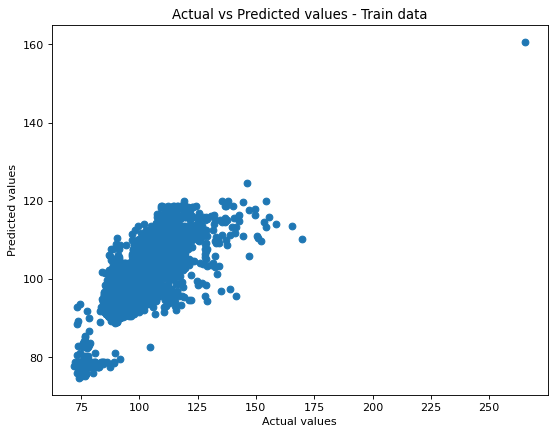

In [45]:
# Actual vs Predicted on Train data
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_train_f,y_train_pred)
plt.title("Actual vs Predicted values - Train data")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.savefig('./assets/Actual_values vs Predicted_values on Train data_XGBoost.png')
plt.show()

<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted values - Validation data')

Text(0.5, 0, 'Actual values')

Text(0, 0.5, 'Predicted values')

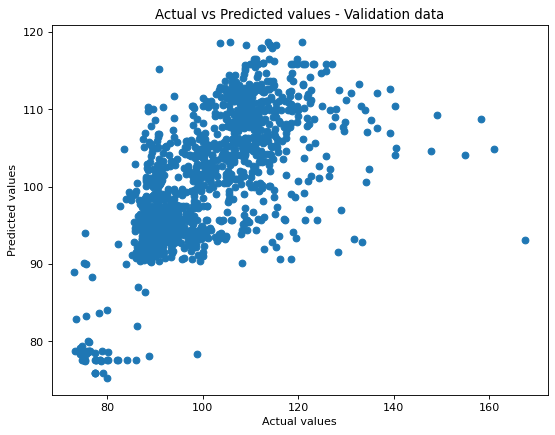

In [46]:
# Actual vs Predicted on Validation data
figure(figsize=(8, 6), dpi=80)
plt.scatter(y_valid_f,y_valid_pred)
plt.title("Actual vs Predicted values - Validation data")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.savefig('./assets/Actual_values vs Predicted_values on Validation data_XGBoost.png')
plt.show()

## Inferences:
1. Tuning hyperparameters led to notable enhancements in R^2 values and RMSE values, showing a nearly linear correlation between actual and predicted values.
2. Despite these improvements, the model still grapples with heteroscedasticity and overfitting issues, displaying strong performance on training data but faltering on test data.
3. Trying other ML models may further improve the performance.

# Predicted values on test set

In [47]:
y_test_pred_df= pd.DataFrame(y_test_pred)
y_test_pred_df.set_index(test_data_ID, inplace=True)

In [48]:
y_test_pred_df

,0
ID,
1,110.458359
2,102.398087
3,110.316177
4,110.370857
5,99.459335
...,...
8410,103.378571
8411,96.646973
8413,101.354752


## <div style="text-align: left"> - Paras Agrawal </div>
##### <div style="text-align: left"> Undergrad at Vellore Institute of Technology, Vellore </div>
##### <div style="text-align: left"> Computer Science and Engineering with Specialization in Information Security </div>